In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from joblib import parallel, delayed
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
import seaborn as sns

In [30]:
data=pd.read_csv('Crop_recommendation.csv')

In [31]:
data.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'Arhar/Tur',
       'mothbeans', 'Moong(Green Gram)', 'Urad', 'Masoor', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [3]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [4]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
data.rainfall.min()

20.21126747

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
len(data.label.unique())

22

In [8]:
from sklearn import preprocessing
label_encoder1 = preprocessing.LabelEncoder()
data['label']= label_encoder1.fit_transform(data['label'])

In [9]:
from joblib import parallel, delayed
import joblib

joblib.dump(label_encoder1,'encode.pkl')

['encode.pkl']

In [10]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


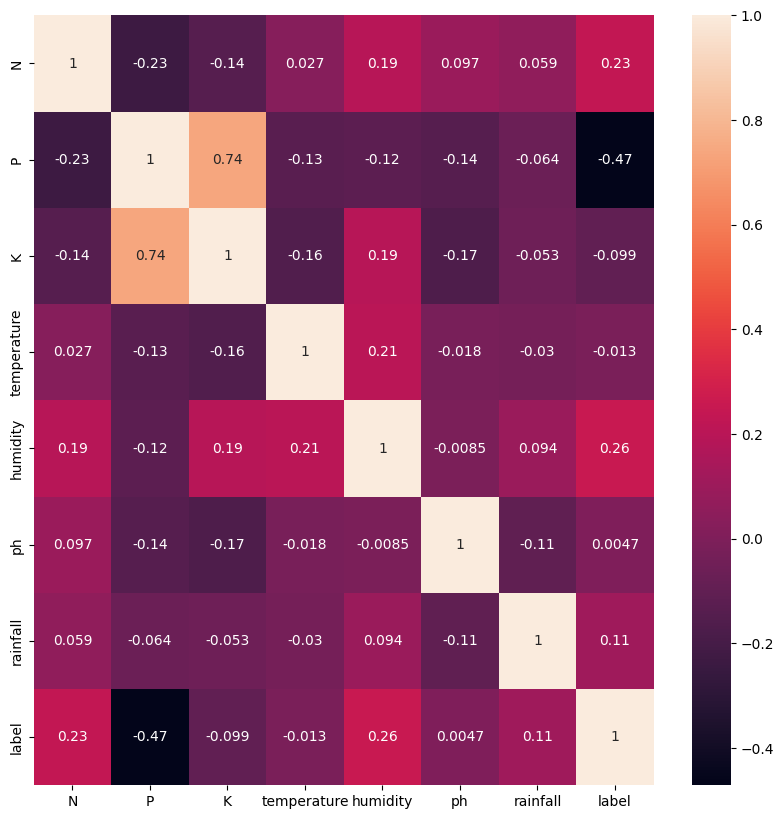

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [12]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall,label
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,10.500000
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,6.345731
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,0.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,5.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,10.500000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,16.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,21.000000


In [13]:
x=data.drop(['label'],axis=1)
y=data['label']

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [15]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [16]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RandomForestClassifier(criterion='entropy', max_features='auto',
                       n_estimators=10)

In [17]:
y_pred_rf= classifier.predict(x_test)  

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_rf)*100

99.31818181818181

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.94      1.00      0.97        17
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00        18
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        15
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00        16
          10       1.00      1.00      1.00        18
          11       0.95      0.95      0.95        21
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        18
          14       1.00      1.00      1.00        21
          15       1.00      0.96      0.98        25
          16       1.00      1.00      1.00        23
          17       1.00    

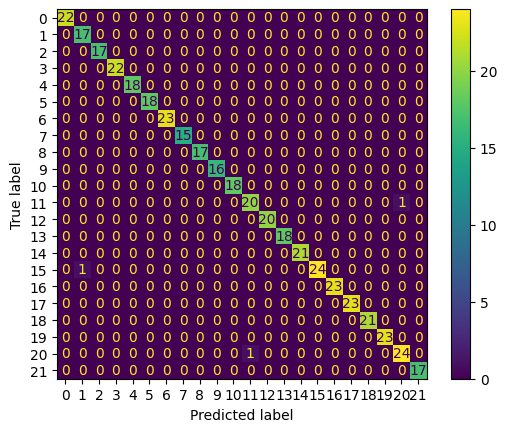

In [19]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred_rf))
cm=confusion_matrix(y_test,y_pred_rf)
cm=ConfusionMatrixDisplay(cm)
cm.plot()
plt.show()

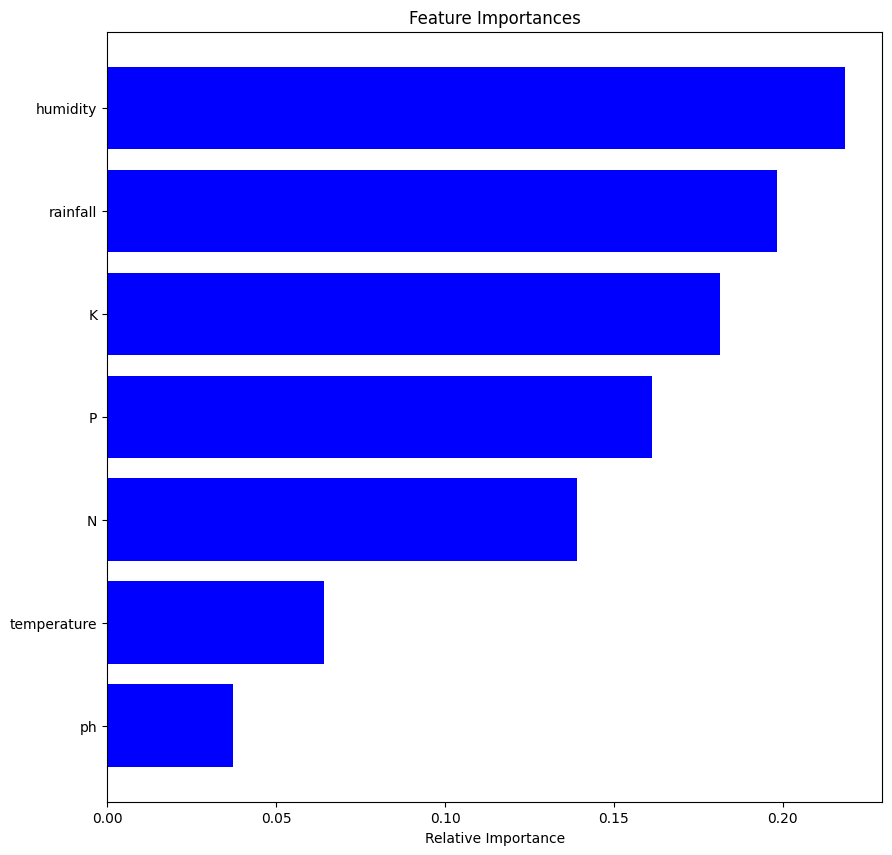

In [20]:
features = data.columns
importances = classifier.feature_importances_
indices = np.argsort(importances)[-39:]  # top 40 features
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [21]:
from joblib import parallel, delayed
import joblib

joblib.dump(classifier,'model.pkl')


['model.pkl']

In [22]:
x_test

,N,P,K,temperature,humidity,ph,rainfall
1320,105,14,50,26.214884,87.688398,6.419052,59.655908
1367,91,12,46,24.644585,85.499382,6.343943,48.312190
1291,14,121,203,9.724458,83.747656,6.158689,74.464111
264,52,73,79,17.257695,18.749440,7.840339,94.002872
728,32,66,17,34.946616,65.267740,7.162358,70.141514
...,...,...,...,...,...,...,...
446,32,70,20,20.893427,46.248565,6.208843,195.569787
1005,93,94,53,25.866324,84.423793,6.079179,114.535750
1919,117,56,15,25.992374,77.054355,7.368258,89.118821
708,27,64,21,32.842130,68.684015,7.543804,73.671662


In [23]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440 entries, 1320 to 1546
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            440 non-null    int64  
 1   P            440 non-null    int64  
 2   K            440 non-null    int64  
 3   temperature  440 non-null    float64
 4   humidity     440 non-null    float64
 5   ph           440 non-null    float64
 6   rainfall     440 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 27.5 KB


In [24]:
data={'N':[40],'P':[40],'K':[40],'temperature':[20],'humidity':[80],'ph':[7],'rainfall':[200]}
data=pd.DataFrame(data)

In [25]:
y=classifier.predict(data) 


In [26]:
from joblib import load
from sklearn.preprocessing import LabelEncoder

In [27]:
label_en = load('encode.pkl')

In [28]:
a = label_en.inverse_transform(y)
print(a)

['papaya']
